# Introduction:
> Before we can apply machine learning to images, we
often first need to transform the raw images to features usable by our learning
algorithms. As with textual data, there are also many pretrained classifiers available
for images that we can use to extract features or objects of interest to use as inputs to
our own models.
>> To work with images, we will primarily use the Open Source Computer Vision
Library (`OpenCV`).

# Loading Images

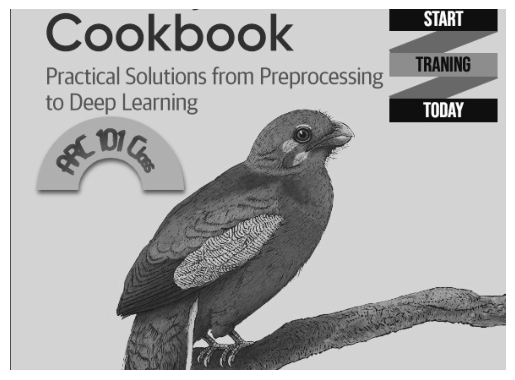

In [1]:
# If you want to load an image for preprocessing, use OpenCV’s imread:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)

# If we want to view the image, we can use the Python plotting library Matplotlib:
# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [8]:
# Fundamentally, images are data, and when we use imread, we convert that data into a
# data type we are very familiar with-->a NumPy array:
# Show data type
type(image)
# np.ndarray

numpy.ndarray

In [9]:
# We have transformed the image into a matrix whose elements correspond to individual pixels. 
# We can even take a look at the actual values of the matrix:
# Show image data
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [12]:
# The resolution of our image is 3600 × 2270, the exact dimensions of our matrix:
# Show dimensions
image.shape
# (510, 834)

(510, 834)

- What does each element in the matrix actually represent? In grayscale images, the
value of an individual element is the `pixel intensity`. Intensity values range from `black
(0) to white (255)`.

In [13]:
# For example, the intensity of the top leftmost pixel in our image has a value of 140:
# Show first pixel
image[0,0]
# 140

255

In [3]:
# In a matrix representing a color image, each element actually contains three values
# corresponding to blue, green, and red values, respectively (BGR):
# Load image in color
image_bgr = cv2.imread("Images/cover.jpg", cv2.IMREAD_COLOR)
# Show pixel
image_bgr[0,0]
# array([195, 144, 111], dtype=uint8)

array([21, 68, 65], dtype=uint8)

- One small caveat: by default `OpenCV uses BGR`, but many image applications, including `Matplotlib` use red, green, blue (RGB), meaning the red and the blue values are swapped. 

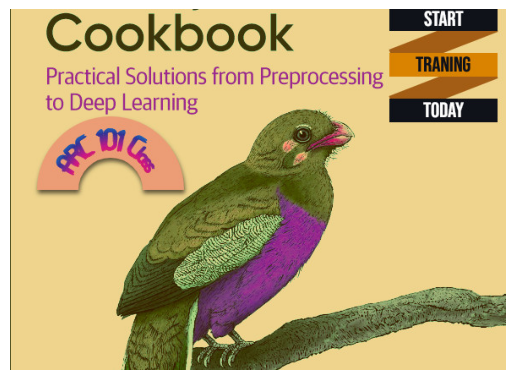

In [4]:
# To properly display OpenCV color images in Matplotlib, we first need to convert the color to RGB:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

# Saving Images
> - OpenCV’s imwrite saves images to the filepath specified. 
> - The format of the image
is defined by the filename’s extension (.jpg, .png, etc.).
>> - One behavior to be careful
about: `imwrite` will overwrite existing files without outputting an error or asking for
confirmation.

In [6]:
# If you want to save an image for preprocessing, use OpenCV’s imwrite:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Save image
cv2.imwrite("Images/cover_new.jpg", image)

True

# Resizing Images
> - Resizing images is a common task in image preprocessing for 2 main reasons:
>> 1.  images come in all shapes and sizes to be usable as features, images must
have the same dimensions.
>>  2. When those images are very large they can take up a lot of memory, and by resizing
them we can dramatically reduce memory usage. Some common image sizes for
machine learning are `32 × 32`, `64 × 64`, `96 × 96`, and `256 × 256`.
>_______________________________
> - Standardizing (resizing) images does come at the cost of
losing some information present in the larger image, as can be seen in the picture
of the airplane.
>> Images are matrices of information, and when we reduce the size of
the image, we are reducing the size of that matrix and the information it contains.
Second, machine learning can require thousands or hundreds of thousands of images.<br><br>
>> **Note:** the method we choose for image resizing will often be a tradeoff between the statistical
performance of our model and computational cost to train it. 


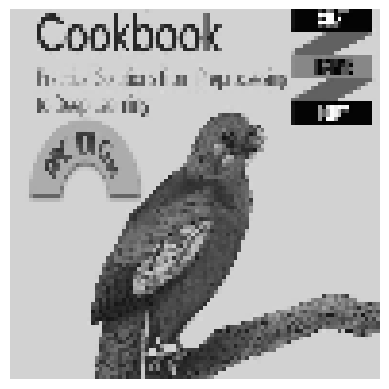

In [9]:
# If you want to resize an image for further preprocessing, use resize to change the size of an image:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (96, 96))
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

# Cropping Images
> - Since OpenCV represents images as a matrix of elements, by selecting the rows and
columns we want to keep we can easily crop the image. Cropping can be particularly
useful if we know that we want to keep only a certain part of every image.
>> **Example:** if our images come from a stationary security camera we can crop all the
images so they contain only the area of interest.

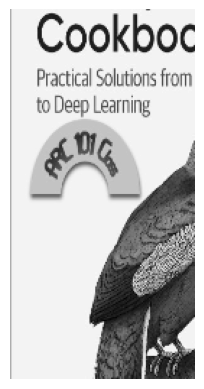

In [13]:
# If you want to remove the outer portion of the image to change its dimensions.
# As the image is encoded as a two-dimensional NumPy array, so we can crop the image easily by slicing the array:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_256x256 = cv2.resize(image, (256, 256))
# Select first half of the columns and all rows
image_cropped = image_256x256[:,:128]
# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

# Blurring Images
> - If you want to smooth out an image.
>> Try to blur an image, each pixel is transformed to be the average value of its neighbors.
>>> This neighbor and the operation performed are mathematically represented as a kernel (don’t worry if you don’t know what a kernel is).


> **Note:** The size of this kernel determines the amount of blurring, with larger kernels producing smoother images.

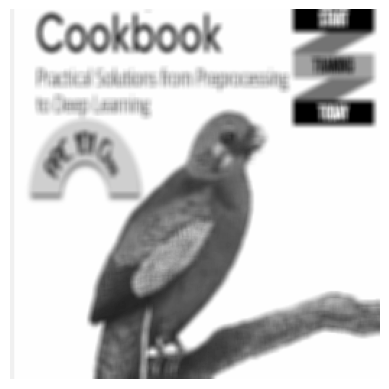

In [14]:
# Here we blur an image by averaging the values of a 5 × 5 kernel around each pixel:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_256x256 = cv2.resize(image, (256, 256))
# Blur image
image_blurry = cv2.blur(image_256x256, (5,5))
# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

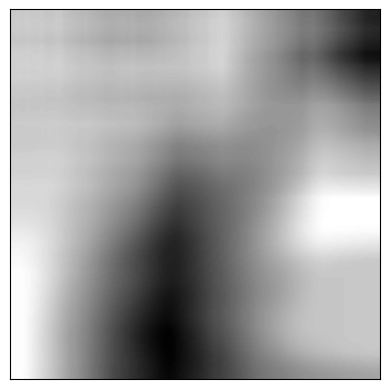

In [15]:
# To highlight the effect of kernel size, here is the same blurring with a 100 × 100 kernel:
# Blur image
image_very_blurry = cv2.blur(image_256x256, (100,100))
# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

- Kernels are widely used in image processing to do everything from sharpening to
edge detection and will come up repeatedly in this chapter.

In [17]:
# The blurring kernel we used looks like this:
# Create kernel
kernel = np.ones((5,5)) / 25.0
# Show kernel
kernel
# array([[ 0.04, 0.04, 0.04, 0.04, 0.04],
#  [ 0.04, 0.04, 0.04, 0.04, 0.04],
#  [ 0.04, 0.04, 0.04, 0.04, 0.04],
#  [ 0.04, 0.04, 0.04, 0.04, 0.04],
#  [ 0.04, 0.04, 0.04, 0.04, 0.04]])

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

- The center element in the kernel is the pixel being examined, while the remaining
elements are its neighbors. Since all elements have the same value (`normalized` to add up
to 1), each has an equal say in the resulting value of the pixel of interest. 

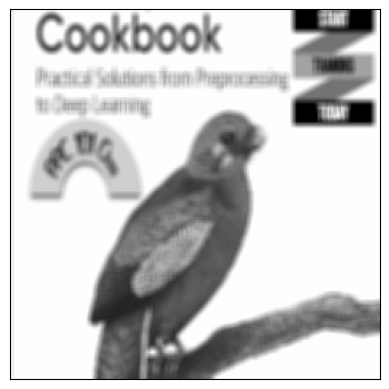

In [18]:
# We can manually apply a kernel to an image using filter2D to produce a similar blurring effect:
# Apply kernel
image_kernel = cv2.filter2D(image_256x256, -1, kernel)
# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

# Sharpening Images
> - Sharpening works similarly to blurring, except instead of using a kernel to average
the neighboring values, we constructed a kernel to highlight the pixel itself.
>> The resulting effect makes contrasts in edges stand out more.

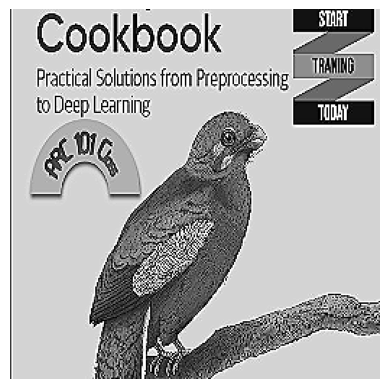

In [19]:
# When you want to sharpen an image, just create a kernel that highlights the target pixel. 
# Then apply it to the image using filter2D:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_256x256 = cv2.resize(image, (256, 256))
# Create kernel
kernel = np.array([[0, -1, 0],
 [-1, 5,-1],
 [0, -1, 0]])
# Sharpen image
image_sharp = cv2.filter2D(image_256x256, -1, kernel)
# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

# Enhancing Contrast
> - The short explanation of how histogram equalization works is that it transforms the image so that it uses
a wider range of pixel intensities.
>> While the resulting image often does not look `“realistic”` we need to remember that
the image is just a visual representation of the underlying data.
>> >If `histogram equalization` is able to make objects of interest more distinguishable from other objects or
backgrounds (which is not always the case), then it can be a valuable addition to our
image preprocessing pipeline.

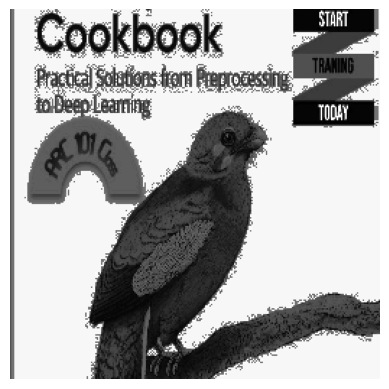

In [21]:
# When we want to increase the contrast between pixels in an image.
# Histogram equalization is a tool for image processing that can make objects and shapes stand out. 
# When we have a grayscale image, we can apply OpenCV’s equalizeHist directly on the image:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_256x256 = cv2.resize(image, (256, 256))
# Enhance image
image_enhanced = cv2.equalizeHist(image_256x256)
# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

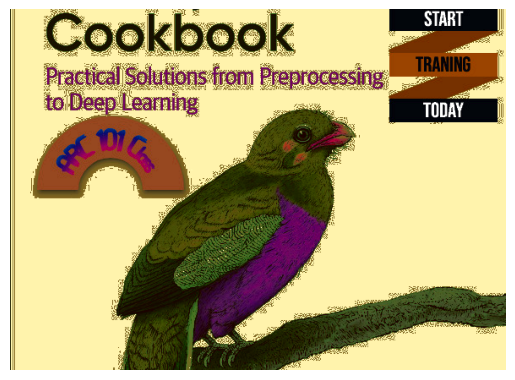

In [24]:
# However, when we have a color image, we first need to convert the image to the YUV color format. 
# The Y is the luma, or brightness, and U and V denote the color. 
# After the conversion, we can apply equalizeHist to the image and then convert it back to BGR or RGB:
# Load image
image_bgr = cv2.imread("Images/cover.jpg")
# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

# Isolating Colors
> - Isolating colors in OpenCV is straightforward.
>> 1. we convert an image into HSV (hue, saturation, and value).
>> 2. we define a range of values we want to isolate, which is probably the most difficult and time-consuming part.
>> 3. we create a mask for the image.

In [27]:
# If you want to isolate a color in an image.
# Just define a range of colors and then apply a mask to the image:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image
image_bgr = cv2.imread("Images/cover.jpg")
# Resize image to 256 pixels by 256 pixels
image_256x256 = cv2.resize(image_bgr, (256, 256))
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_256x256, cv2.COLOR_BGR2HSV)
# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])
# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

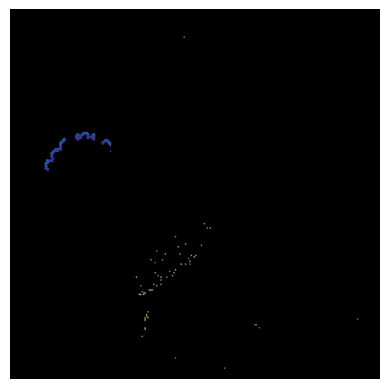

In [28]:
# Finally, we apply the mask to the image using bitwise_and and convert to our desired output format.
# Mask image
image_bgr_masked = cv2.bitwise_and(image_256x256, image_256x256, mask=mask)
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

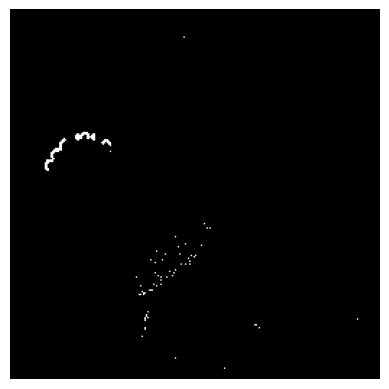

In [29]:
# Image masking is a common technique meant to extract regions of interest. In this case, our mask keeps only the white areas:
# Show image
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

# Binarizing Images

> The process of binarizing an image involves converting a greyscale image to its black
and white form.

> - Thresholding is the process of setting pixels with intensity greater than some value
to be white and less than the value to be black.


> - A more advanced technique is
`adaptive thresholding`, where the threshold value for a pixel is determined by the pixel
intensities of its neighbors.
>> - This can be helpful when lighting conditions change over
different regions in an image:

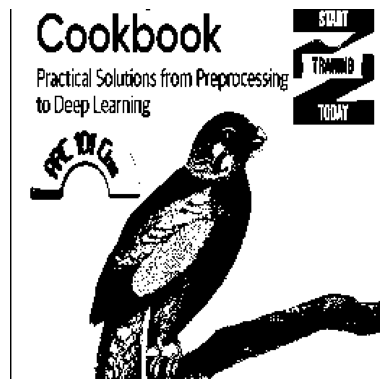

In [1]:
# Given an image, you want to output a simplified version.
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image
image_gray = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 256 pixels by 256 pixels
image_256x256 = cv2.resize(image_gray, (256, 256))
# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_256x256,
 max_output_value,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

- Our solution has four important arguments in `adaptiveThreshold`.
`max_output_value` simply determines the maximum intensity of the output pixel
intensities. `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` sets a pixel’s threshold to be a weighted sum of the neighboring pixel intensities. The weights are determined by a `Gaussian window`

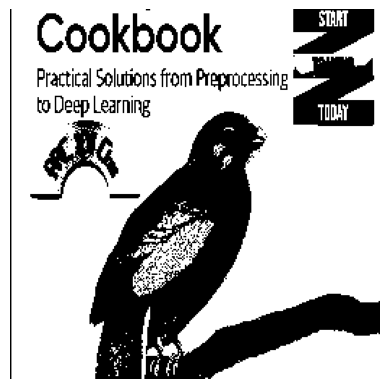

In [3]:
# Alternatively, we could set the threshold to simply the mean of the neighboring pixels with cv2.ADAPTIVE_THRESH_MEAN_C:
# Apply cv2.ADAPTIVE_THRESH_MEAN_C
image_mean_threshold = cv2.adaptiveThreshold(image_256x256,
 max_output_value,
cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
# Show image
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

> - **Note:** The last two parameters are the `block size` (the size of the neighborhood used to
determine a pixel’s threshold) and a constant subtracted from the calculated threshold (used to manually fine-tune the threshold).
>>- A major benefit of thresholding is denoising an image, keeping only the most important elements.
>>> **Example:** thresholding is often applied to photos of printed text to
isolate the letters from the page.

# Removing Backgrounds
> The first thing we notice is that even though GrabCut did a pretty good job, there
are still areas of background left in the image. 
>> We could go back and manually mark
those areas as background, but in the real world we have thousands of images and
manually fixing them individually is not feasible.
>>> Therefore, we would do well by
simply accepting that the image data will still contain some background noise.

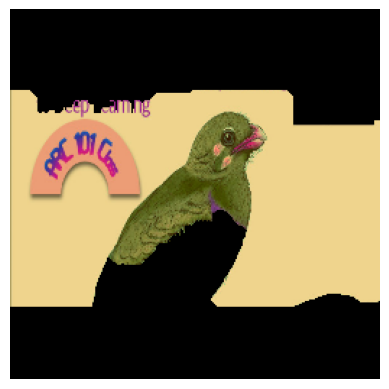

In [3]:
# If you want to isolate the foreground of an image, just mark a rectangle around the desired foreground, 
# then run the GrabCut algorithm:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image and convert to RGB
image_bgr = cv2.imread("Images/cover.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Resize image to 256 pixels by 256 pixels
image_256x256 = cv2.resize(image_rgb, (256, 256))
# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)
# Create initial mask
mask = np.zeros(image_256x256.shape[:2], np.uint8)
# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
# Run grabCut
cv2.grabCut(image_256x256, # Our image
             mask, # The Mask
             rectangle, # Our rectangle
             bgdModel, # Temporary array for background
             fgdModel, # Temporary array for background
             5, # Number of iterations
             cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle
# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
# Multiply image with new mask to subtract background
image_rgb_nobg = image_256x256 * mask_2[:, :, np.newaxis]
# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

# In the above, we start by marking a rectangle around the area that contains the foreground.

> - GrabCut assumes everything outside this rectangle to be background and uses that information to figure out what is likely background inside the square.
>> - Then a `mask` is created that denotes the different `definitely/likely background/foreground` regions:

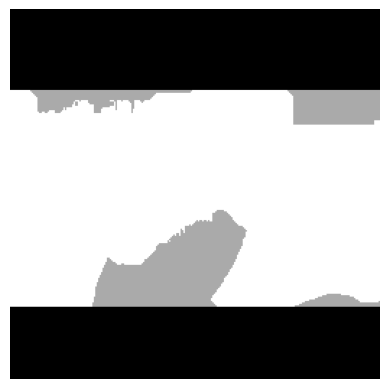

In [4]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

- The black region is the area outside our rectangle that is assumed to be definitely background.
- The gray area is what GrabCut considered likely background, while the white area is likely foreground.

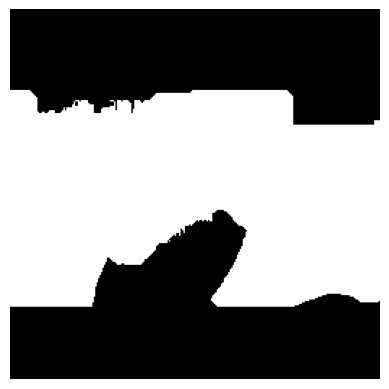

In [5]:
# This mask is then used to create a second mask that merges the black and gray regions:
# Show mask
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()
# The second mask is then applied to the image so that only the foreground remains.

# Detecting Edges
> Edge detection is a major topic of interest in computer vision. Edges are important
because they are areas of high information. For example, in our image one patch of
sky looks very much like another and is unlikely to contain unique or interesting
information. However, patches where the background sky meets the airplane contain
a lot of information (e.g., an object’s shape).
> > Edge detection allows us to remove low information areas and isolate the areas of images containing the most information.
>> - There are many edge detection techniques (`Sobel filters`, `Laplacian edge detector`,
etc.). However, our solution uses the commonly used `Canny edge detector`.

> **Canny detector:** requires two parameters denoting low and high
gradient threshold values.
> > Potential edge pixels between the low and high thresholds
are considered weak edge pixels, while those above the high threshold are considered
strong edge pixels.
> > - **Note:** OpenCV’s Canny method includes the low and high thresholds as
required parameters.
>>> The below example, we set the lower and upper thresholds to be one
standard deviation below and above the image’s median pixel intensity.
> >> - However, we
often get better results if we determine a good pair of low and high threshold values
through manual trial and error on a few images before running Canny on our entire
collection of images.

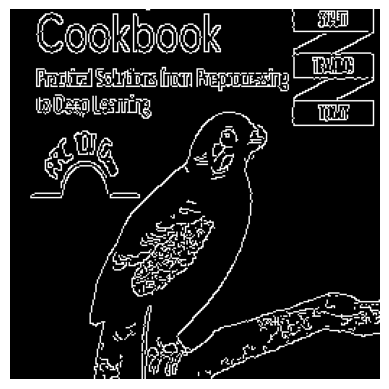

In [6]:
# If you want to find the edges in an image,
# use an edge detection technique like the Canny edge detector:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image_gray = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 256 pixels by 256 pixels
image_256x256 = cv2.resize(image_gray, (256, 256))
# Calculate median intensity
median_intensity = np.median(image_256x256)
# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# Apply Canny edge detector
image_canny = cv2.Canny(image_256x256, lower_threshold, upper_threshold)
# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

# Detecting Corners
> The `Harris corner detector` is a commonly used method of detecting the intersection
of two edges. Our interest in detecting corners is motivated by the same reason as
for detecting edges:
> > corners are points of high information. A simplified explanation is that it looks for windows (also called neighborhoods or patches) where small movements of the window (imagine shaking
the window) create big changes in the contents of the pixels inside the window.

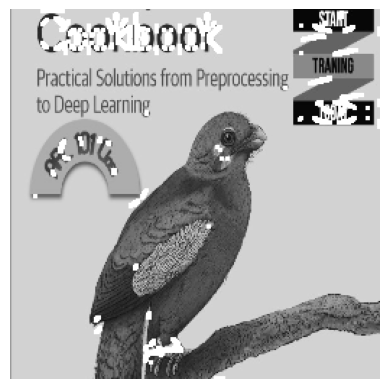

In [8]:
# If you want to detect the corners in an image,
# use OpenCV’s implementation of the Harris corner detector, cornerHarris:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image
image_bgr = cv2.imread("Images/cover.jpg")
# Resize image to 256 pixels by 256 pixels
image_256x256 = cv2.resize(image_bgr, (256, 256))
image_gray = cv2.cvtColor(image_256x256, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04
# Detect corners
detector_responses = cv2.cornerHarris(image_gray, block_size, aperture, free_parameter)
# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)
# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_256x256[detector_responses > threshold * detector_responses.max()] = [255,255,255]
# Convert to grayscale
image_gray = cv2.cvtColor(image_256x256, cv2.COLOR_BGR2GRAY)
# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

- cornerHarris contains three important parameters that we can use to control the
edges detected.
> 1. `block_size` is the size of the neighbor around each pixel used
for corner detection.
> 2. `aperture` is the size of the Sobel kernel used (don’t
worry if you don’t know what that is),
> 3. There is a `free` parameter where larger values correspond to identifying softer corners.

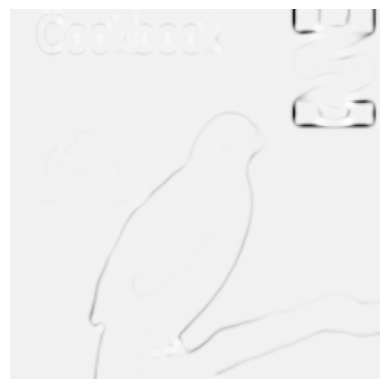

In [9]:
# The output is a grayscale image depicting potential corners:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

> - We then apply thresholding to keep only the most likely corners.
> - Alternatively, we can use a similar detector, the `Shi-Tomasi corner detector`, which works in a similar
way to the Harris detector (goodFeaturesToTrack) to identify a fixed number of strong corners.

>> `goodFeaturesToTrack` takes three major parameters
>> 1. the number of corners to detect,
>> 2. the minimum quality of the corner (0 to 1),
>> 3. the minimum Euclidean distance between corners

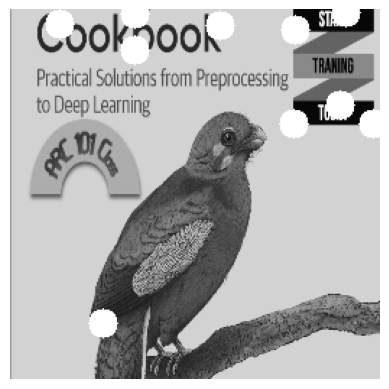

In [10]:
# Load image
image_bgr = cv2.imread("Images/cover.jpg")
# Resize image to 256 pixels by 256 pixels
image_256x256 = cv2.resize(image_bgr, (256, 256))
image_gray = cv2.cvtColor(image_256x256, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
# Number of corners to detect
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25
# Detect corners
corners = cv2.goodFeaturesToTrack(image_gray,
 corners_to_detect,
minimum_quality_score,
minimum_distance)
corners = np.int16(corners)
# Draw white circle at each corner
for corner in corners:
 x, y = corner[0]
 cv2.circle(image_256x256, (x,y), 10, (255,255,255), -1)
# Convert to grayscale
image_256x256 = cv2.cvtColor(image_256x256, cv2.COLOR_BGR2GRAY)
# Show image
plt.imshow(image_256x256, cmap='gray'), plt.axis("off")
plt.show()

# Creating Features for Machine Learning
> - If you want to convert an image into an observation for machine learning,
use NumPy’s `flatten` to convert the `multidimensional array` containing image data
into a `vector` containing the observation’s values:

In [11]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))
# Convert image data to one-dimensional vector
image_10x10.flatten()

array([212, 209,  51,  52, 214, 208, 212, 212,  21,  18, 212, 212, 214,
       212, 212, 212, 212, 212, 134, 142, 212, 202, 135,  96, 212, 212,
       212, 212,  17,  18, 212, 132, 173, 212, 212, 116, 108, 212, 212,
       212, 212, 136, 158, 189,  86, 119, 212, 212, 212, 212, 212, 212,
       212,  88, 131,  81, 132, 212, 212, 212, 212, 212, 212, 135, 179,
        94, 212, 212, 212, 212, 212, 212,  93, 167,  70,  88, 212, 212,
       212, 212, 212, 212, 209,  90,  72, 212, 113, 115,  98, 101, 212,
       212, 111,  65, 158,  80, 216, 212, 212, 212], dtype=uint8)

- Images are presented as a grid of pixels. If an image is in grayscale, each pixel is
presented by one value (i.e., pixel intensity is 1 if white, 0 if black). 

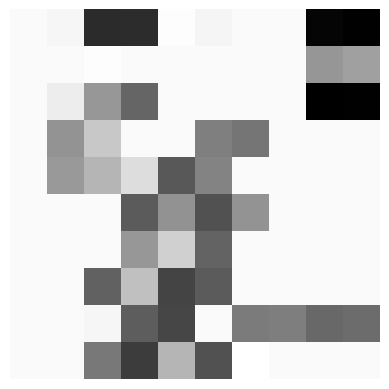

In [12]:
# For example, imagine we have a 10 × 10–pixel image:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In [13]:
# In this case, the dimensions of the image’s data will be 10 × 10:
image_10x10.shape
# (10, 10)

(10, 10)

In [14]:
# And if we flatten the array, we get a vector of length 100 (10 multiplied by 10):
image_10x10.flatten().shape
# (100,)

(100,)

#### This is the feature data for our image that can be joined with the vectors from other images to create the data we will feed to our machine learning algorithms.
____________________________________________

> If the image is in color, instead of each pixel being represented by one value, it is
represented by multiple values (most often three) representing the channels (red,
green, blue, etc.) that blend to make the final color of that pixel.
> > For this reason, if our 10 × 10 image is in color, we will have 300 feature values for each observation:

In [15]:
# Load image in color
image_color = cv2.imread("Images/cover.jpg", cv2.IMREAD_COLOR)
# Resize image to 10 pixels by 10 pixels
image_color_10x10 = cv2.resize(image_color, (10, 10))
# Convert image data to one-dimensional vector, show dimensions
image_color_10x10.flatten().shape
# (300,)

(300,)

- One of the major challenges of image processing and computer vision is that since
every pixel location in a collection of images is a feature, as the images get larger, the
number of features explodes:

In [16]:
# Load image in grayscale
image_gray = cv2.imread("Images/cover.jpg", cv2.IMREAD_GRAYSCALE)
# Convert image data to one-dimensional vector, show dimensions
image_gray.flatten().shape

(250649,)

In [17]:
# And the number of features grows even larger when the image is in color:
# Load image in color
image_256x256_color = cv2.imread("Images/cover.jpg", cv2.IMREAD_COLOR)
# Convert image data to one-dimensional vector, show dimensions
image_256x256_color.flatten().shape

(751947,)

> - As the output shows, even a small color image has almost 200,000 features, which
can cause problems when we are training our models because the number of features
might far exceed the number of observations.
>> This problem will motivate dimensionality strategies
which attempt to reduce the number of features while not losing an excessive amount
of information contained in the data.

# Encoding Color Histograms as Features

In [27]:
# If you want to create a set of features representing the colors appearing in an image.
# Just compute the histograms for each color channel:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)
# Load image
image_bgr = cv2.imread("Images/cover.jpg", cv2.IMREAD_COLOR)
# Resize image to 256 pixels by 256 pixels
image_256x256 = cv2.resize(image_bgr, (256, 256))
# Convert to RGB
image_rgb = cv2.cvtColor(image_256x256, cv2.COLOR_BGR2RGB)
# Create a list for feature values
features = []
# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
 histogram = cv2.calcHist([image_rgb], # Image
                          [i], # Index of channel
                          None, # No mask
                          [256], # Histogram size
                          [0,256]) # Range
    
features.extend(histogram)
# Create a vector for an observation's feature values
observation = np.array(features).flatten()
# Show the observation's value for the first five features
observation[0:5]
# array([ 1008., 217., 184., 165., 116.], dtype=float32)

array([520., 238., 223., 208., 170.], dtype=float32)

- In the RGB color model, each color is the combination of three color channels (i.e.,
red, green, blue). In turn, each channel can take on one of 256 values (represented by
an integer between 0 and 255).

In [28]:
# For example, the top leftmost pixel in our image has the following channel values:
# Show RGB channel values
image_rgb[0,0]
# array([107, 163, 212], dtype=uint8)

array([177, 161,  98], dtype=uint8)

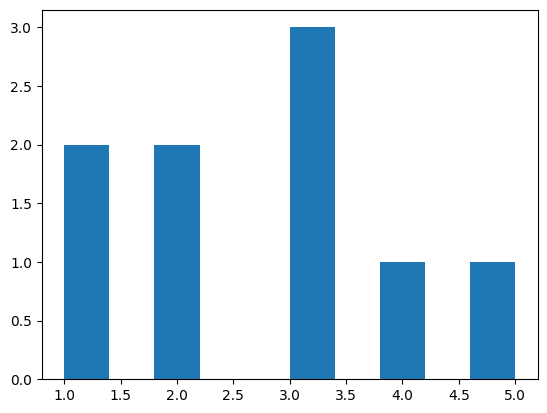

In [29]:
# A histogram is a representation of the distribution of values in data. 
# Here’s a simple example:
# Import pandas
import pandas as pd
# Create some data
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])
# Show the histogram
data.hist(grid=False)
plt.show()

> - In this example, we have some data with two 1s, two 2s, three 3s, one 4, and one 5. In
the histogram, each bar represents the number of times each value (1, 2, etc.) appears in our data.
____________________________________________

> We can apply this same technique to each of the color channels, but instead of five
possible values, we have 256 (the number of possible values for a channel value).
>> The x-axis represents the 256 possible channel values, and the y-axis represents the
number of times a particular channel value appears across all pixels in an image:

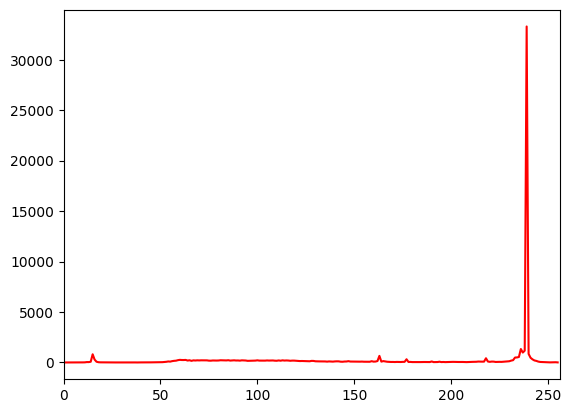

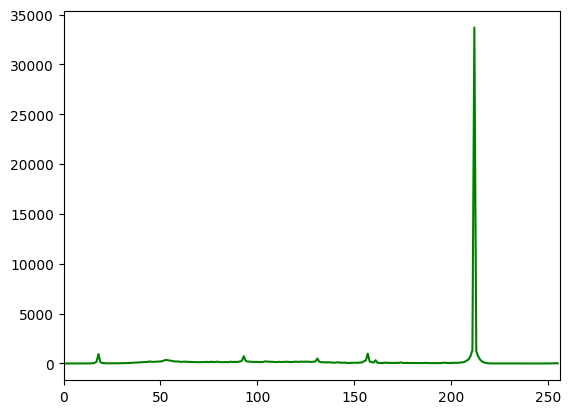

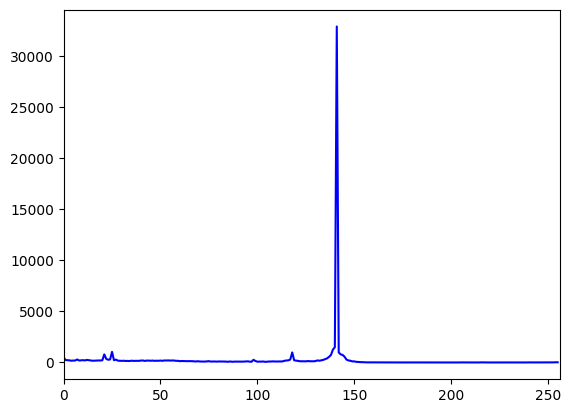

In [31]:
# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram, make plot
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                          [i], # Index of channel
                          None, # No mask
                          [256], # Histogram size
                          [0,256]) # Range
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
    # Show plot
    plt.show()

- As we can see in the histogram, barely any pixels contain the blue channel values between 0 and ~180, while many pixels contain blue channel values between ~190 and ~210. 

- This distribution of channel values is shown for all three channels. The
histogram, however, is not simply a visualization; it has 256 features for each color
channel, making for 768 total features representing the distribution of colors in an
image.

# Using Pretrained Embeddings as Features
> In the ML space, transfer learning is often defined as taking information learned from
one task and using it as input to another task.
> > Instead of starting from zero, we
can use representations already learned from large pretrained image models (such as
`ResNet`) to get a head start on our own machine learning models. 

> **Note:** In TensorFlow, another common library for deep learning, we can use `tensorflow_hub`

In [33]:
# If you want to load pretrained embeddings from an existing model in PyTorch and use them as input to one of your own models,
# use torchvision.models to select a model and then retrieve an embedding from itfor a given image:
# Load libraries
import cv2
import numpy as np
import torch
from torchvision import transforms
import torchvision.models as models
# Load image
image_bgr = cv2.imread("Images/cover.jpg", cv2.IMREAD_COLOR)
# Convert to pytorch data type
convert_tensor = transforms.ToTensor()
pytorch_image = convert_tensor(np.array(image_rgb))
# Load the pretrained model
model = models.resnet18(weights=True)
# Select the specific layer of the model we want output from
layer = model._modules.get('avgpool')
# Set model to evaluation mode
model.eval()
# Infer the embedding with the no_grad option
with torch.no_grad():
    embedding = model(pytorch_image.unsqueeze(0))
print(embedding.shape)
# torch.Size([1, 1000])

torch.Size([1, 1000])


# Detecting Objects with OpenCV
> `Haar cascade classifiers` are machine learning models used to learn a set of image
features (specifically Haar features) that can be used to detect objects in images.
> > The features themselves are simple rectangular features that are determined by calculating
the difference in sums between rectangular regions.
> > > Subsequently, a gradient boosting algorithm is applied to learn the most important features and, finally, create a
relatively strong model using cascading classifiers.
>____________________________________
> - these pretrained models can be easily downloaded from places such as the
OpenCV GitHub(https://github.com/opencv/opencv) as XML files and applied to images without training a model
yourself.
>> This is useful in cases where you want to add simple binary image features
such as contains_face (or any other object) to your data.

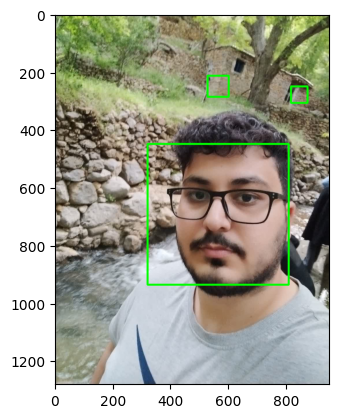

In [53]:
# If you want to detect objects in images using pretrained cascade classifiers with OpenCV.
# Just download and run one of OpenCV’s Haar cascade classifiers. 
# In this case, we use apretrained face detection model to detect and draw a rectangle around a face in an image:
# Import libraries
import cv2
from matplotlib import pyplot as plt
# first download the xml file:
# https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier()
face_cascade.load(cv2.samples.findFile("models/haarcascade_frontalface_default.xml"))
# Load image
image_bgr = cv2.imread("Images/kaveh.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Detect faces and draw a rectangle
faces = face_cascade.detectMultiScale(image_rgb)
for (x,y,w,h) in faces:
    cv2.rectangle(image_rgb, (x, y),
    (x + h, y + w),
    (0, 255, 0), 5)
# Show the image
plt.subplot(1, 1, 1)
plt.imshow(image_rgb)
plt.show()

# Classifying Images with Pytorch
> Many pretrained deep learning models for image classification are easily available
via both PyTorch and TensorFlow.
> > In this example, we used ResNet18, a deep neural
network architecture that was trained on the ImageNet dataset that is 18 layers
deep.
> > >Deeper ResNet models, such as ResNet101 and ResNet152, are also available
in Pytorch—and beyond that there are many other image models to choose from.
>________________________________________
> Models trained on the ImageNet dataset are able to output predicted probabilities
for all classes defined in the `imagenet_class_index` variable in the previous code snippet, which we downloaded from GitHub.

In [63]:
# If you want to classify images using pretrained deep learning models in Pytorch.
# Just use torchvision.models to select a pretrained image classification model and feed the image through it:
# Load libraries
import cv2
from matplotlib import pyplot as plt
import json
import numpy as np
import torch
from torchvision import transforms
from torchvision.models import resnet18
import urllib.request
# Instantiate pretrained model
model = resnet18(weights=True)
# Load image
image_bgr = cv2.imread("Images/cover.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Convert to pytorch data type
convert_tensor = transforms.ToTensor()
pytorch_image = convert_tensor(np.array(image_rgb))
# Set model to evaluation mode
model.eval()
# Make a prediction
prediction = model(pytorch_image.unsqueeze(0))
# Get the index of the highest predicted probability
_, index = torch.max(prediction, 1)
# Convert that to a percentage value
percentage = torch.nn.functional.softmax(prediction, dim=1)[0] * 100
# Print the name of the item at the index along with the percent confidence
print(index.item(), percentage[index.tolist()[0]].item())
# airship 6.0569939613342285

921 6.150202751159668


--> `921` 	`book jacket, dust cover, dust jacket, dust wrapper`

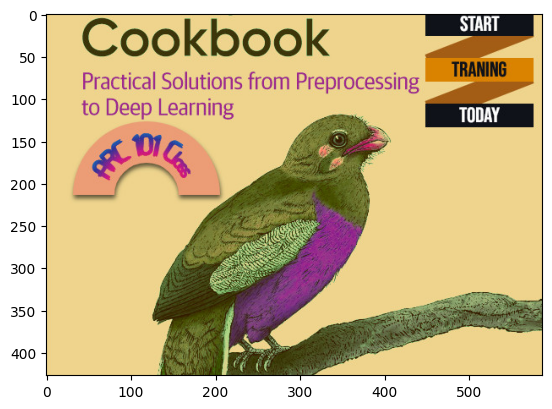

In [64]:
plt.imshow(image_rgb)

# ImagNet class names

| Class ID | Class Name                                                                                                                |
|----------|---------------------------------------------------------------------------------------------------------------------------|
| 0        | tench, Tinca tinca                                                                                                        |
| 1        | goldfish, Carassius auratus                                                                                               |
| 2        | great white shark, white shark, man-eater, man-eating shark, Carcharodon caharias',                                       |
| 3        | tiger shark, Galeocerdo cuvieri                                                                                           |
| 4        | hammerhead, hammerhead shark                                                                                              |
| 5        | electric ray, crampfish, numbfish, torpedo                                                                                |
| 6        | stingray                                                                                                                  |
| 7        | cock                                                                                                                      |
| 8        | hen                                                                                                                       |
| 9        | ostrich, Struthio camelus                                                                                                 |
| 10       | brambling, Fringilla montifringilla                                                                                       |
| 11       | goldfinch, Carduelis carduelis                                                                                            |
| 12       | house finch, linnet, Carpodacus mexicanus                                                                                 |
| 13       | junco, snowbird                                                                                                           |
| 14       | indigo bunting, indigo finch, indigo bird, Passerina cyanea                                                               |
| 15       | robin, American robin, Turdus migratorius                                                                                 |
| 16       | bulbul                                                                                                                    |
| 17       | jay                                                                                                                       |
| 18       | magpie                                                                                                                    |
| 19       | chickadee                                                                                                                 |
| 20       | water ouzel, dipper                                                                                                       |
| 21       | kite                                                                                                                      |
| 22       | bald eagle, American eagle, Haliaeetus leucocephalus                                                                      |
| 23       | vulture                                                                                                                   |
| 24       | great grey owl, great gray owl, Strix nebulosa                                                                            |
| 25       | European fire salamander, Salamandra salamandra                                                                           |
| 26       | common newt, Triturus vulgaris                                                                                            |
| 27       | eft                                                                                                                       |
| 28       | spotted salamander, Ambystoma maculatum                                                                                   |
| 29       | axolotl, mud puppy, Ambystoma mexicanum                                                                                   |
| 30       | bullfrog, Rana catesbeiana                                                                                                |
| 31       | tree frog, tree-frog                                                                                                      |
| 32       | tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui                                                           |
| 33       | loggerhead, loggerhead turtle, Caretta caretta                                                                            |
| 34       | leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea                                                    |
| 35       | mud turtle                                                                                                                |
| 36       | terrapin                                                                                                                  |
| 37       | box turtle, box tortoise                                                                                                  |
| 38       | banded gecko                                                                                                              |
| 39       | common iguana, iguana, Iguana iguana                                                                                      |
| 40       | American chameleon, anole, Anolis carolinensis                                                                            |
| 41       | whiptail, whiptail lizard                                                                                                 |
| 42       | agama                                                                                                                     |
| 43       | frilled lizard, Chlamydosaurus kingi                                                                                      |
| 44       | alligator lizard                                                                                                          |
| 45       | Gila monster, Heloderma suspectum                                                                                         |
| 46       | green lizard, Lacerta viridis                                                                                             |
| 47       | African chameleon, Chamaeleo chamaeleon                                                                                   |
| 48       | Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoeis',                                            |
| 49       | African crocodile, Nile crocodile, Crocodylus niloticus                                                                   |
| 50       | American alligator, Alligator mississipiensis                                                                             |
| 51       | triceratops                                                                                                               |
| 52       | thunder snake, worm snake, Carphophis amoenus                                                                             |
| 53       | ringneck snake, ring-necked snake, ring snake                                                                             |
| 54       | hognose snake, puff adder, sand viper                                                                                     |
| 55       | green snake, grass snake                                                                                                  |
| 56       | king snake, kingsnake                                                                                                     |
| 57       | garter snake, grass snake                                                                                                 |
| 58       | water snake                                                                                                               |
| 59       | vine snake                                                                                                                |
| 60       | night snake, Hypsiglena torquata                                                                                          |
| 61       | boa constrictor, Constrictor constrictor                                                                                  |
| 62       | rock python, rock snake, Python sebae                                                                                     |
| 63       | Indian cobra, Naja naja                                                                                                   |
| 64       | green mamba                                                                                                               |
| 65       | sea snake                                                                                                                 |
| 66       | horned viper, cerastes, sand viper, horned asp, Cerastes cornutus                                                         |
| 67       | diamondback, diamondback rattlesnake, Crotalus adamanteus                                                                 |
| 68       | sidewinder, horned rattlesnake, Crotalus cerastes                                                                         |
| 69       | trilobite                                                                                                                 |
| 70       | harvestman, daddy longlegs, Phalangium opilio                                                                             |
| 71       | scorpion                                                                                                                  |
| 72       | black and gold garden spider, Argiope aurantia                                                                            |
| 73       | barn spider, Araneus cavaticus                                                                                            |
| 74       | garden spider, Aranea diademata                                                                                           |
| 75       | black widow, Latrodectus mactans                                                                                          |
| 76       | tarantula                                                                                                                 |
| 77       | wolf spider, hunting spider                                                                                               |
| 78       | tick                                                                                                                      |
| 79       | centipede                                                                                                                 |
| 80       | black grouse                                                                                                              |
| 81       | ptarmigan                                                                                                                 |
| 82       | ruffed grouse, partridge, Bonasa umbellus                                                                                 |
| 83       | prairie chicken, prairie grouse, prairie fowl                                                                             |
| 84       | peacock                                                                                                                   |
| 85       | quail                                                                                                                     |
| 86       | partridge                                                                                                                 |
| 87       | African grey, African gray, Psittacus erithacus                                                                           |
| 88       | macaw                                                                                                                     |
| 89       | sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita                                                              |
| 90       | lorikeet                                                                                                                  |
| 91       | coucal                                                                                                                    |
| 92       | bee eater                                                                                                                 |
| 93       | hornbill                                                                                                                  |
| 94       | hummingbird                                                                                                               |
| 95       | jacamar                                                                                                                   |
| 96       | toucan                                                                                                                    |
| 97       | drake                                                                                                                     |
| 98       | red-breasted merganser, Mergus serrator                                                                                   |
| 99       | goose                                                                                                                     |
| 100      | black swan, Cygnus atratus                                                                                                |
| 101      | tusker                                                                                                                    |
| 102      | echidna, spiny anteater, anteater                                                                                         |
| 103      | platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhyhus anatinus',                                   |
| 104      | wallaby, brush kangaroo                                                                                                   |
| 105      | koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus                                                     |
| 106      | wombat                                                                                                                    |
| 107      | jellyfish                                                                                                                 |
| 108      | sea anemone, anemone                                                                                                      |
| 109      | brain coral                                                                                                               |
| 110      | flatworm, platyhelminth                                                                                                   |
| 111      | nematode, nematode worm, roundworm                                                                                        |
| 112      | conch                                                                                                                     |
| 113      | snail                                                                                                                     |
| 114      | slug                                                                                                                      |
| 115      | sea slug, nudibranch                                                                                                      |
| 116      | chiton, coat-of-mail shell, sea cradle, polyplacophore                                                                    |
| 117      | chambered nautilus, pearly nautilus, nautilus                                                                             |
| 118      | Dungeness crab, Cancer magister                                                                                           |
| 119      | rock crab, Cancer irroratus                                                                                               |
| 120      | fiddler crab                                                                                                              |
| 121      | king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodesamtschatica',                                    |
| 122      | American lobster, Northern lobster, Maine lobster, Homarus americanus                                                     |
| 123      | spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish                                                  |
| 124      | crayfish, crawfish, crawdad, crawdaddy                                                                                    |
| 125      | hermit crab                                                                                                               |
| 126      | isopod                                                                                                                    |
| 127      | white stork, Ciconia ciconia                                                                                              |
| 128      | black stork, Ciconia nigra                                                                                                |
| 129      | spoonbill                                                                                                                 |
| 130      | flamingo                                                                                                                  |
| 131      | little blue heron, Egretta caerulea                                                                                       |
| 132      | American egret, great white heron, Egretta albus                                                                          |
| 133      | bittern                                                                                                                   |
| 134      | crane, bird                                                                                                               |
| 135      | limpkin, Aramus pictus                                                                                                    |
| 136      | European gallinule, Porphyrio porphyrio                                                                                   |
| 137      | American coot, marsh hen, mud hen, water hen, Fulica americana                                                            |
| 138      | bustard                                                                                                                   |
| 139      | ruddy turnstone, Arenaria interpres                                                                                       |
| 140      | red-backed sandpiper, dunlin, Erolia alpina                                                                               |
| 141      | redshank, Tringa totanus                                                                                                  |
| 142      | dowitcher                                                                                                                 |
| 143      | oystercatcher, oyster catcher                                                                                             |
| 144      | pelican                                                                                                                   |
| 145      | king penguin, Aptenodytes patagonica                                                                                      |
| 146      | albatross, mollymawk                                                                                                      |
| 147      | grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius rostus',                                           |
| 148      | killer whale, killer, orca, grampus, sea wolf, Orcinus orca                                                               |
| 149      | dugong, Dugong dugon                                                                                                      |
| 150      | sea lion                                                                                                                  |
| 151      | Chihuahua                                                                                                                 |
| 152      | Japanese spaniel                                                                                                          |
| 153      | Maltese dog, Maltese terrier, Maltese                                                                                     |
| 154      | Pekinese, Pekingese, Peke                                                                                                 |
| 155      | Shih-Tzu                                                                                                                  |
| 156      | Blenheim spaniel                                                                                                          |
| 157      | papillon                                                                                                                  |
| 158      | toy terrier                                                                                                               |
| 159      | Rhodesian ridgeback                                                                                                       |
| 160      | Afghan hound, Afghan                                                                                                      |
| 161      | basset, basset hound                                                                                                      |
| 162      | beagle                                                                                                                    |
| 163      | bloodhound, sleuthhound                                                                                                   |
| 164      | bluetick                                                                                                                  |
| 165      | black-and-tan coonhound                                                                                                   |
| 166      | Walker hound, Walker foxhound                                                                                             |
| 167      | English foxhound                                                                                                          |
| 168      | redbone                                                                                                                   |
| 169      | borzoi, Russian wolfhound                                                                                                 |
| 170      | Irish wolfhound                                                                                                           |
| 171      | Italian greyhound                                                                                                         |
| 172      | whippet                                                                                                                   |
| 173      | Ibizan hound, Ibizan Podenco                                                                                              |
| 174      | Norwegian elkhound, elkhound                                                                                              |
| 175      | otterhound, otter hound                                                                                                   |
| 176      | Saluki, gazelle hound                                                                                                     |
| 177      | Scottish deerhound, deerhound                                                                                             |
| 178      | Weimaraner                                                                                                                |
| 179      | Staffordshire bullterrier, Staffordshire bull terrier                                                                     |
| 180      | American Staffordshire terrier, Staffordshire terrier, American pit bull rrier, pit bull terrier',                        |
| 181      | Bedlington terrier                                                                                                        |
| 182      | Border terrier                                                                                                            |
| 183      | Kerry blue terrier                                                                                                        |
| 184      | Irish terrier                                                                                                             |
| 185      | Norfolk terrier                                                                                                           |
| 186      | Norwich terrier                                                                                                           |
| 187      | Yorkshire terrier                                                                                                         |
| 188      | wire-haired fox terrier                                                                                                   |
| 189      | Lakeland terrier                                                                                                          |
| 190      | Sealyham terrier, Sealyham                                                                                                |
| 191      | Airedale, Airedale terrier                                                                                                |
| 192      | cairn, cairn terrier                                                                                                      |
| 193      | Australian terrier                                                                                                        |
| 194      | Dandie Dinmont, Dandie Dinmont terrier                                                                                    |
| 195      | Boston bull, Boston terrier                                                                                               |
| 196      | miniature schnauzer                                                                                                       |
| 197      | giant schnauzer                                                                                                           |
| 198      | standard schnauzer                                                                                                        |
| 199      | Scotch terrier, Scottish terrier, Scottie                                                                                 |
| 200      | Tibetan terrier, chrysanthemum dog                                                                                        |
| 201      | silky terrier, Sydney silky                                                                                               |
| 202      | soft-coated wheaten terrier                                                                                               |
| 203      | West Highland white terrier                                                                                               |
| 204      | Lhasa, Lhasa apso                                                                                                         |
| 205      | flat-coated retriever                                                                                                     |
| 206      | curly-coated retriever                                                                                                    |
| 207      | golden retriever                                                                                                          |
| 208      | Labrador retriever                                                                                                        |
| 209      | Chesapeake Bay retriever                                                                                                  |
| 210      | German short-haired pointer                                                                                               |
| 211      | vizsla, Hungarian pointer                                                                                                 |
| 212      | English setter                                                                                                            |
| 213      | Irish setter, red setter                                                                                                  |
| 214      | Gordon setter                                                                                                             |
| 215      | Brittany spaniel                                                                                                          |
| 216      | clumber, clumber spaniel                                                                                                  |
| 217      | English springer, English springer spaniel                                                                                |
| 218      | Welsh springer spaniel                                                                                                    |
| 219      | cocker spaniel, English cocker spaniel, cocker                                                                            |
| 220      | Sussex spaniel                                                                                                            |
| 221      | Irish water spaniel                                                                                                       |
| 222      | kuvasz                                                                                                                    |
| 223      | schipperke                                                                                                                |
| 224      | groenendael                                                                                                               |
| 225      | malinois                                                                                                                  |
| 226      | briard                                                                                                                    |
| 227      | kelpie                                                                                                                    |
| 228      | komondor                                                                                                                  |
| 229      | Old English sheepdog, bobtail                                                                                             |
| 230      | Shetland sheepdog, Shetland sheep dog, Shetland                                                                           |
| 231      | collie                                                                                                                    |
| 232      | Border collie                                                                                                             |
| 233      | Bouvier des Flandres, Bouviers des Flandres                                                                               |
| 234      | Rottweiler                                                                                                                |
| 235      | German shepherd, German shepherd dog, German police dog, alsatian                                                         |
| 236      | Doberman, Doberman pinscher                                                                                               |
| 237      | miniature pinscher                                                                                                        |
| 238      | Greater Swiss Mountain dog                                                                                                |
| 239      | Bernese mountain dog                                                                                                      |
| 240      | Appenzeller                                                                                                               |
| 241      | EntleBucher                                                                                                               |
| 242      | boxer                                                                                                                     |
| 243      | bull mastiff                                                                                                              |
| 244      | Tibetan mastiff                                                                                                           |
| 245      | French bulldog                                                                                                            |
| 246      | Great Dane                                                                                                                |
| 247      | Saint Bernard, St Bernard                                                                                                 |
| 248      | Eskimo dog, husky                                                                                                         |
| 249      | malamute, malemute, Alaskan malamute                                                                                      |
| 250      | Siberian husky                                                                                                            |
| 251      | dalmatian, coach dog, carriage dog                                                                                        |
| 252      | affenpinscher, monkey pinscher, monkey dog                                                                                |
| 253      | basenji                                                                                                                   |
| 254      | pug, pug-dog                                                                                                              |
| 255      | Leonberg                                                                                                                  |
| 256      | Newfoundland, Newfoundland dog                                                                                            |
| 257      | Great Pyrenees                                                                                                            |
| 258      | Samoyed, Samoyede                                                                                                         |
| 259      | Pomeranian                                                                                                                |
| 260      | chow, chow chow                                                                                                           |
| 261      | keeshond                                                                                                                  |
| 262      | Brabancon griffon                                                                                                         |
| 263      | Pembroke, Pembroke Welsh corgi                                                                                            |
| 264      | Cardigan, Cardigan Welsh corgi                                                                                            |
| 265      | toy poodle                                                                                                                |
| 266      | miniature poodle                                                                                                          |
| 267      | standard poodle                                                                                                           |
| 268      | Mexican hairless                                                                                                          |
| 269      | timber wolf, grey wolf, gray wolf, Canis lupus                                                                            |
| 270      | white wolf, Arctic wolf, Canis lupus tundrarum                                                                            |
| 271      | red wolf, maned wolf, Canis rufus, Canis niger                                                                            |
| 272      | coyote, prairie wolf, brush wolf, Canis latrans                                                                           |
| 273      | dingo, warrigal, warragal, Canis dingo                                                                                    |
| 274      | dhole, Cuon alpinus                                                                                                       |
| 275      | African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus                                                           |
| 276      | hyena, hyaena                                                                                                             |
| 277      | red fox, Vulpes vulpes                                                                                                    |
| 278      | kit fox, Vulpes macrotis                                                                                                  |
| 279      | Arctic fox, white fox, Alopex lagopus                                                                                     |
| 280      | grey fox, gray fox, Urocyon cinereoargenteus                                                                              |
| 281      | tabby, tabby cat                                                                                                          |
| 282      | tiger cat                                                                                                                 |
| 283      | Persian cat                                                                                                               |
| 284      | Siamese cat, Siamese                                                                                                      |
| 285      | Egyptian cat                                                                                                              |
| 286      | cougar, puma, catamount, mountain lion, painter, panther, Felis concolor                                                  |
| 287      | lynx, catamount                                                                                                           |
| 288      | leopard, Panthera pardus                                                                                                  |
| 289      | snow leopard, ounce, Panthera uncia                                                                                       |
| 290      | jaguar, panther, Panthera onca, Felis onca                                                                                |
| 291      | lion, king of beasts, Panthera leo                                                                                        |
| 292      | tiger, Panthera tigris                                                                                                    |
| 293      | cheetah, chetah, Acinonyx jubatus                                                                                         |
| 294      | brown bear, bruin, Ursus arctos                                                                                           |
| 295      | American black bear, black bear, Ursus americanus, Euarctos americanus                                                    |
| 296      | ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                                                               |
| 297      | sloth bear, Melursus ursinus, Ursus ursinus                                                                               |
| 298      | mongoose                                                                                                                  |
| 299      | meerkat, mierkat                                                                                                          |
| 300      | tiger beetle                                                                                                              |
| 301      | ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle                                                               |
| 302      | ground beetle, carabid beetle                                                                                             |
| 303      | long-horned beetle, longicorn, longicorn beetle                                                                           |
| 304      | leaf beetle, chrysomelid                                                                                                  |
| 305      | dung beetle                                                                                                               |
| 306      | rhinoceros beetle                                                                                                         |
| 307      | weevil                                                                                                                    |
| 308      | fly                                                                                                                       |
| 309      | bee                                                                                                                       |
| 310      | ant, emmet, pismire                                                                                                       |
| 311      | grasshopper, hopper                                                                                                       |
| 312      | cricket                                                                                                                   |
| 313      | walking stick, walkingstick, stick insect                                                                                 |
| 314      | cockroach, roach                                                                                                          |
| 315      | mantis, mantid                                                                                                            |
| 316      | cicada, cicala                                                                                                            |
| 317      | leafhopper                                                                                                                |
| 318      | lacewing, lacewing fly                                                                                                    |
| 319      | dragonfly, darning needle, devil's darning needle, sewing needle, snake fder, snake doctor, mosquito hawk, skeeter hawk", |
| 320      | damselfly                                                                                                                 |
| 321      | admiral                                                                                                                   |
| 322      | ringlet, ringlet butterfly                                                                                                |
| 323      | monarch, monarch butterfly, milkweed butterfly, Danaus plexippus                                                          |
| 324      | cabbage butterfly                                                                                                         |
| 325      | sulphur butterfly, sulfur butterfly                                                                                       |
| 326      | lycaenid, lycaenid butterfly                                                                                              |
| 327      | starfish, sea star                                                                                                        |
| 328      | sea urchin                                                                                                                |
| 329      | sea cucumber, holothurian                                                                                                 |
| 330      | wood rabbit, cottontail, cottontail rabbit                                                                                |
| 331      | hare                                                                                                                      |
| 332      | Angora, Angora rabbit                                                                                                     |
| 333      | hamster                                                                                                                   |
| 334      | porcupine, hedgehog                                                                                                       |
| 335      | fox squirrel, eastern fox squirrel, Sciurus niger                                                                         |
| 336      | marmot                                                                                                                    |
| 337      | beaver                                                                                                                    |
| 338      | guinea pig, Cavia cobaya                                                                                                  |
| 339      | sorrel                                                                                                                    |
| 340      | zebra                                                                                                                     |
| 341      | hog, pig, grunter, squealer, Sus scrofa                                                                                   |
| 342      | wild boar, boar, Sus scrofa                                                                                               |
| 343      | warthog                                                                                                                   |
| 344      | hippopotamus, hippo, river horse, Hippopotamus amphibius                                                                  |
| 345      | ox                                                                                                                        |
| 346      | water buffalo, water ox, Asiatic buffalo, Bubalus bubalis                                                                 |
| 347      | bison                                                                                                                     |
| 348      | ram, tup                                                                                                                  |
| 349      | bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain eep, Ovis canadensis',                           |
| 350      | ibex, Capra ibex                                                                                                          |
| 351      | hartebeest                                                                                                                |
| 352      | impala, Aepyceros melampus                                                                                                |
| 353      | gazelle                                                                                                                   |
| 354      | Arabian camel, dromedary, Camelus dromedarius                                                                             |
| 355      | llama                                                                                                                     |
| 356      | weasel                                                                                                                    |
| 357      | mink                                                                                                                      |
| 358      | polecat, fitch, foulmart, foumart, Mustela putorius                                                                       |
| 359      | black-footed ferret, ferret, Mustela nigripes                                                                             |
| 360      | otter                                                                                                                     |
| 361      | skunk, polecat, wood pussy                                                                                                |
| 362      | badger                                                                                                                    |
| 363      | armadillo                                                                                                                 |
| 364      | three-toed sloth, ai, Bradypus tridactylus                                                                                |
| 365      | orangutan, orang, orangutang, Pongo pygmaeus                                                                              |
| 366      | gorilla, Gorilla gorilla                                                                                                  |
| 367      | chimpanzee, chimp, Pan troglodytes                                                                                        |
| 368      | gibbon, Hylobates lar                                                                                                     |
| 369      | siamang, Hylobates syndactylus, Symphalangus syndactylus                                                                  |
| 370      | guenon, guenon monkey                                                                                                     |
| 371      | patas, hussar monkey, Erythrocebus patas                                                                                  |
| 372      | baboon                                                                                                                    |
| 373      | macaque                                                                                                                   |
| 374      | langur                                                                                                                    |
| 375      | colobus, colobus monkey                                                                                                   |
| 376      | proboscis monkey, Nasalis larvatus                                                                                        |
| 377      | marmoset                                                                                                                  |
| 378      | capuchin, ringtail, Cebus capucinus                                                                                       |
| 379      | howler monkey, howler                                                                                                     |
| 380      | titi, titi monkey                                                                                                         |
| 381      | spider monkey, Ateles geoffroyi                                                                                           |
| 382      | squirrel monkey, Saimiri sciureus                                                                                         |
| 383      | Madagascar cat, ring-tailed lemur, Lemur catta                                                                            |
| 384      | indri, indris, Indri indri, Indri brevicaudatus                                                                           |
| 385      | Indian elephant, Elephas maximus                                                                                          |
| 386      | African elephant, Loxodonta africana                                                                                      |
| 387      | lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens                                                       |
| 388      | giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca                                                         |
| 389      | barracouta, snoek                                                                                                         |
| 390      | eel                                                                                                                       |
| 391      | coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch                                                  |
| 392      | rock beauty, Holocanthus tricolor                                                                                         |
| 393      | anemone fish                                                                                                              |
| 394      | sturgeon                                                                                                                  |
| 395      | gar, garfish, garpike, billfish, Lepisosteus osseus                                                                       |
| 396      | lionfish                                                                                                                  |
| 397      | puffer, pufferfish, blowfish, globefish                                                                                   |
| 398      | abacus                                                                                                                    |
| 399      | abaya                                                                                                                     |
| 400      | academic gown, academic robe, judge's robe                                                                                |
| 401      | accordion, piano accordion, squeeze box                                                                                   |
| 402      | acoustic guitar                                                                                                           |
| 403      | aircraft carrier, carrier, flattop, attack aircraft carrier                                                               |
| 404      | airliner                                                                                                                  |
| 405      | airship, dirigible                                                                                                        |
| 406      | altar                                                                                                                     |
| 407      | ambulance                                                                                                                 |
| 408      | amphibian, amphibious vehicle                                                                                             |
| 409      | analog clock                                                                                                              |
| 410      | apiary, bee house                                                                                                         |
| 411      | apron                                                                                                                     |
| 412      | ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustb, trash barrel, trash bin',                      |
| 413      | assault rifle, assault gun                                                                                                |
| 414      | backpack, back pack, knapsack, packsack, rucksack, haversack                                                              |
| 415      | bakery, bakeshop, bakehouse                                                                                               |
| 416      | balance beam, beam                                                                                                        |
| 417      | balloon                                                                                                                   |
| 418      | ballpoint, ballpoint pen, ballpen, Biro                                                                                   |
| 419      | Band Aid                                                                                                                  |
| 420      | banjo                                                                                                                     |
| 421      | bannister, banister, balustrade, balusters, handrail                                                                      |
| 422      | barbell                                                                                                                   |
| 423      | barber chair                                                                                                              |
| 424      | barbershop                                                                                                                |
| 425      | barn                                                                                                                      |
| 426      | barometer                                                                                                                 |
| 427      | barrel, cask                                                                                                              |
| 428      | barrow, garden cart, lawn cart, wheelbarrow                                                                               |
| 429      | baseball                                                                                                                  |
| 430      | basketball                                                                                                                |
| 431      | bassinet                                                                                                                  |
| 432      | bassoon                                                                                                                   |
| 433      | bathing cap, swimming cap                                                                                                 |
| 434      | bath towel                                                                                                                |
| 435      | bathtub, bathing tub, bath, tub                                                                                           |
| 436      | beach wagon, station wagon, wagon, estate car, beach waggon, station wagg, waggon',                                       |
| 437      | beacon, lighthouse, beacon light, pharos                                                                                  |
| 438      | beaker                                                                                                                    |
| 439      | bearskin, busby, shako                                                                                                    |
| 440      | beer bottle                                                                                                               |
| 441      | beer glass                                                                                                                |
| 442      | bell cote, bell cot                                                                                                       |
| 443      | bib                                                                                                                       |
| 444      | bicycle-built-for-two, tandem bicycle, tandem                                                                             |
| 445      | bikini, two-piece                                                                                                         |
| 446      | binder, ring-binder                                                                                                       |
| 447      | binoculars, field glasses, opera glasses                                                                                  |
| 448      | birdhouse                                                                                                                 |
| 449      | boathouse                                                                                                                 |
| 450      | bobsled, bobsleigh, bob                                                                                                   |
| 451      | bolo tie, bolo, bola tie, bola                                                                                            |
| 452      | bonnet, poke bonnet                                                                                                       |
| 453      | bookcase                                                                                                                  |
| 454      | bookshop, bookstore, bookstall                                                                                            |
| 455      | bottlecap                                                                                                                 |
| 456      | bow                                                                                                                       |
| 457      | bow tie, bow-tie, bowtie                                                                                                  |
| 458      | brass, memorial tablet, plaque                                                                                            |
| 459      | brassiere, bra, bandeau                                                                                                   |
| 460      | breakwater, groin, groyne, mole, bulwark, seawall, jetty                                                                  |
| 461      | breastplate, aegis, egis                                                                                                  |
| 462      | broom                                                                                                                     |
| 463      | bucket, pail                                                                                                              |
| 464      | buckle                                                                                                                    |
| 465      | bulletproof vest                                                                                                          |
| 466      | bullet train, bullet                                                                                                      |
| 467      | butcher shop, meat market                                                                                                 |
| 468      | cab, hack, taxi, taxicab                                                                                                  |
| 469      | caldron, cauldron                                                                                                         |
| 470      | candle, taper, wax light                                                                                                  |
| 471      | cannon                                                                                                                    |
| 472      | canoe                                                                                                                     |
| 473      | can opener, tin opener                                                                                                    |
| 474      | cardigan                                                                                                                  |
| 475      | car mirror                                                                                                                |
| 476      | carousel, carrousel, merry-go-round, roundabout, whirligig                                                                |
| 477      | carpenter's kit, tool kit                                                                                                 |
| 478      | carton                                                                                                                    |
| 479      | car wheel                                                                                                                 |
| 480      | cash machine, cash dispenser, automated teller machine, automatic teller chine, automated teller, automatic teller, ATM', |
| 481      | cassette                                                                                                                  |
| 482      | cassette player                                                                                                           |
| 483      | castle                                                                                                                    |
| 484      | catamaran                                                                                                                 |
| 485      | CD player                                                                                                                 |
| 486      | cello, violoncello                                                                                                        |
| 487      | cellular telephone, cellular phone, cellphone, cell, mobile phone                                                         |
| 488      | chain                                                                                                                     |
| 489      | chainlink fence                                                                                                           |
| 490      | chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring mour',                                           |
| 491      | chain saw, chainsaw                                                                                                       |
| 492      | chest                                                                                                                     |
| 493      | chiffonier, commode                                                                                                       |
| 494      | chime, bell, gong                                                                                                         |
| 495      | china cabinet, china closet                                                                                               |
| 496      | Christmas stocking                                                                                                        |
| 497      | church, church building                                                                                                   |
| 498      | cinema, movie theater, movie theatre, movie house, picture palace                                                         |
| 499      | cleaver, meat cleaver, chopper                                                                                            |
| 500      | cliff dwelling                                                                                                            |
| 501      | cloak                                                                                                                     |
| 502      | clog, geta, patten, sabot                                                                                                 |
| 503      | cocktail shaker                                                                                                           |
| 504      | coffee mug                                                                                                                |
| 505      | coffeepot                                                                                                                 |
| 506      | coil, spiral, volute, whorl, helix                                                                                        |
| 507      | combination lock                                                                                                          |
| 508      | computer keyboard, keypad                                                                                                 |
| 509      | confectionery, confectionary, candy store                                                                                 |
| 510      | container ship, containership, container vessel                                                                           |
| 511      | convertible                                                                                                               |
| 512      | corkscrew, bottle screw                                                                                                   |
| 513      | cornet, horn, trumpet, trump                                                                                              |
| 514      | cowboy boot                                                                                                               |
| 515      | cowboy hat, ten-gallon hat                                                                                                |
| 516      | cradle                                                                                                                    |
| 517      | crane                                                                                                                     |
| 518      | crash helmet                                                                                                              |
| 519      | crate                                                                                                                     |
| 520      | crib, cot                                                                                                                 |
| 521      | Crock Pot                                                                                                                 |
| 522      | croquet ball                                                                                                              |
| 523      | crutch                                                                                                                    |
| 524      | cuirass                                                                                                                   |
| 525      | dam, dike, dyke                                                                                                           |
| 526      | desk                                                                                                                      |
| 527      | desktop computer                                                                                                          |
| 528      | dial telephone, dial phone                                                                                                |
| 529      | diaper, nappy, napkin                                                                                                     |
| 530      | digital clock                                                                                                             |
| 531      | digital watch                                                                                                             |
| 532      | dining table, board                                                                                                       |
| 533      | dishrag, dishcloth                                                                                                        |
| 534      | dishwasher, dish washer, dishwashing machine                                                                              |
| 535      | disk brake, disc brake                                                                                                    |
| 536      | dock, dockage, docking facility                                                                                           |
| 537      | dogsled, dog sled, dog sleigh                                                                                             |
| 538      | dome                                                                                                                      |
| 539      | doormat, welcome mat                                                                                                      |
| 540      | drilling platform, offshore rig                                                                                           |
| 541      | drum, membranophone, tympan                                                                                               |
| 542      | drumstick                                                                                                                 |
| 543      | dumbbell                                                                                                                  |
| 544      | Dutch oven                                                                                                                |
| 545      | electric fan, blower                                                                                                      |
| 546      | electric guitar                                                                                                           |
| 547      | electric locomotive                                                                                                       |
| 548      | entertainment center                                                                                                      |
| 549      | envelope                                                                                                                  |
| 550      | espresso maker                                                                                                            |
| 551      | face powder                                                                                                               |
| 552      | feather boa, boa                                                                                                          |
| 553      | file, file cabinet, filing cabinet                                                                                        |
| 554      | fireboat                                                                                                                  |
| 555      | fire engine, fire truck                                                                                                   |
| 556      | fire screen, fireguard                                                                                                    |
| 557      | flagpole, flagstaff                                                                                                       |
| 558      | flute, transverse flute                                                                                                   |
| 559      | folding chair                                                                                                             |
| 560      | football helmet                                                                                                           |
| 561      | forklift                                                                                                                  |
| 562      | fountain                                                                                                                  |
| 563      | fountain pen                                                                                                              |
| 564      | four-poster                                                                                                               |
| 565      | freight car                                                                                                               |
| 566      | French horn, horn                                                                                                         |
| 567      | frying pan, frypan, skillet                                                                                               |
| 568      | fur coat                                                                                                                  |
| 569      | garbage truck, dustcart                                                                                                   |
| 570      | gasmask, respirator, gas helmet                                                                                           |
| 571      | gas pump, gasoline pump, petrol pump, island dispenser                                                                    |
| 572      | goblet                                                                                                                    |
| 573      | go-kart                                                                                                                   |
| 574      | golf ball                                                                                                                 |
| 575      | golfcart, golf cart                                                                                                       |
| 576      | gondola                                                                                                                   |
| 577      | gong, tam-tam                                                                                                             |
| 578      | gown                                                                                                                      |
| 579      | grand piano, grand                                                                                                        |
| 580      | greenhouse, nursery, glasshouse                                                                                           |
| 581      | grille, radiator grille                                                                                                   |
| 582      | grocery store, grocery, food market, market                                                                               |
| 583      | guillotine                                                                                                                |
| 584      | hair slide                                                                                                                |
| 585      | hair spray                                                                                                                |
| 586      | half track                                                                                                                |
| 587      | hammer                                                                                                                    |
| 588      | hamper                                                                                                                    |
| 589      | hand blower, blow dryer, blow drier, hair dryer, hair drier                                                               |
| 590      | hand-held computer, hand-held microcomputer                                                                               |
| 591      | handkerchief, hankie, hanky, hankey                                                                                       |
| 592      | hard disc, hard disk, fixed disk                                                                                          |
| 593      | harmonica, mouth organ, harp, mouth harp                                                                                  |
| 594      | harp                                                                                                                      |
| 595      | harvester, reaper                                                                                                         |
| 596      | hatchet                                                                                                                   |
| 597      | holster                                                                                                                   |
| 598      | home theater, home theatre                                                                                                |
| 599      | honeycomb                                                                                                                 |
| 600      | hook, claw                                                                                                                |
| 601      | hoopskirt, crinoline                                                                                                      |
| 602      | horizontal bar, high bar                                                                                                  |
| 603      | horse cart, horse-cart                                                                                                    |
| 604      | hourglass                                                                                                                 |
| 605      | iPod                                                                                                                      |
| 606      | iron, smoothing iron                                                                                                      |
| 607      | jack-o'-lantern                                                                                                           |
| 608      | jean, blue jean, denim                                                                                                    |
| 609      | jeep, landrover                                                                                                           |
| 610      | jersey, T-shirt, tee shirt                                                                                                |
| 611      | jigsaw puzzle                                                                                                             |
| 612      | jinrikisha, ricksha, rickshaw                                                                                             |
| 613      | joystick                                                                                                                  |
| 614      | kimono                                                                                                                    |
| 615      | knee pad                                                                                                                  |
| 616      | knot                                                                                                                      |
| 617      | lab coat, laboratory coat                                                                                                 |
| 618      | ladle                                                                                                                     |
| 619      | lampshade, lamp shade                                                                                                     |
| 620      | laptop, laptop computer                                                                                                   |
| 621      | lawn mower, mower                                                                                                         |
| 622      | lens cap, lens cover                                                                                                      |
| 623      | letter opener, paper knife, paperknife                                                                                    |
| 624      | library                                                                                                                   |
| 625      | lifeboat                                                                                                                  |
| 626      | lighter, light, igniter, ignitor                                                                                          |
| 627      | limousine, limo                                                                                                           |
| 628      | liner, ocean liner                                                                                                        |
| 629      | lipstick, lip rouge                                                                                                       |
| 630      | Loafer                                                                                                                    |
| 631      | lotion                                                                                                                    |
| 632      | loudspeaker, speaker, speaker unit, loudspeaker system, speaker system                                                    |
| 633      | loupe, jeweler's loupe                                                                                                    |
| 634      | lumbermill, sawmill                                                                                                       |
| 635      | magnetic compass                                                                                                          |
| 636      | mailbag, postbag                                                                                                          |
| 637      | mailbox, letter box                                                                                                       |
| 638      | maillot                                                                                                                   |
| 639      | maillot, tank suit                                                                                                        |
| 640      | manhole cover                                                                                                             |
| 641      | maraca                                                                                                                    |
| 642      | marimba, xylophone                                                                                                        |
| 643      | mask                                                                                                                      |
| 644      | matchstick                                                                                                                |
| 645      | maypole                                                                                                                   |
| 646      | maze, labyrinth                                                                                                           |
| 647      | measuring cup                                                                                                             |
| 648      | medicine chest, medicine cabinet                                                                                          |
| 649      | megalith, megalithic structure                                                                                            |
| 650      | microphone, mike                                                                                                          |
| 651      | microwave, microwave oven                                                                                                 |
| 652      | military uniform                                                                                                          |
| 653      | milk can                                                                                                                  |
| 654      | minibus                                                                                                                   |
| 655      | miniskirt, mini                                                                                                           |
| 656      | minivan                                                                                                                   |
| 657      | missile                                                                                                                   |
| 658      | mitten                                                                                                                    |
| 659      | mixing bowl                                                                                                               |
| 660      | mobile home, manufactured home                                                                                            |
| 661      | Model T                                                                                                                   |
| 662      | modem                                                                                                                     |
| 663      | monastery                                                                                                                 |
| 664      | monitor                                                                                                                   |
| 665      | moped                                                                                                                     |
| 666      | mortar                                                                                                                    |
| 667      | mortarboard                                                                                                               |
| 668      | mosque                                                                                                                    |
| 669      | mosquito net                                                                                                              |
| 670      | motor scooter, scooter                                                                                                    |
| 671      | mountain bike, all-terrain bike, off-roader                                                                               |
| 672      | mountain tent                                                                                                             |
| 673      | mouse, computer mouse                                                                                                     |
| 674      | mousetrap                                                                                                                 |
| 675      | moving van                                                                                                                |
| 676      | muzzle                                                                                                                    |
| 677      | nail                                                                                                                      |
| 678      | neck brace                                                                                                                |
| 679      | necklace                                                                                                                  |
| 680      | nipple                                                                                                                    |
| 681      | notebook, notebook computer                                                                                               |
| 682      | obelisk                                                                                                                   |
| 683      | oboe, hautboy, hautbois                                                                                                   |
| 684      | ocarina, sweet potato                                                                                                     |
| 685      | odometer, hodometer, mileometer, milometer                                                                                |
| 686      | oil filter                                                                                                                |
| 687      | organ, pipe organ                                                                                                         |
| 688      | oscilloscope, scope, cathode-ray oscilloscope, CRO                                                                        |
| 689      | overskirt                                                                                                                 |
| 690      | oxcart                                                                                                                    |
| 691      | oxygen mask                                                                                                               |
| 692      | packet                                                                                                                    |
| 693      | paddle, boat paddle                                                                                                       |
| 694      | paddlewheel, paddle wheel                                                                                                 |
| 695      | padlock                                                                                                                   |
| 696      | paintbrush                                                                                                                |
| 697      | pajama, pyjama, pj's, jammies                                                                                             |
| 698      | palace                                                                                                                    |
| 699      | panpipe, pandean pipe, syrinx                                                                                             |
| 700      | paper towel                                                                                                               |
| 701      | parachute, chute                                                                                                          |
| 702      | parallel bars, bars                                                                                                       |
| 703      | park bench                                                                                                                |
| 704      | parking meter                                                                                                             |
| 705      | passenger car, coach, carriage                                                                                            |
| 706      | patio, terrace                                                                                                            |
| 707      | pay-phone, pay-station                                                                                                    |
| 708      | pedestal, plinth, footstall                                                                                               |
| 709      | pencil box, pencil case                                                                                                   |
| 710      | pencil sharpener                                                                                                          |
| 711      | perfume, essence                                                                                                          |
| 712      | Petri dish                                                                                                                |
| 713      | photocopier                                                                                                               |
| 714      | pick, plectrum, plectron                                                                                                  |
| 715      | pickelhaube                                                                                                               |
| 716      | picket fence, paling                                                                                                      |
| 717      | pickup, pickup truck                                                                                                      |
| 718      | pier                                                                                                                      |
| 719      | piggy bank, penny bank                                                                                                    |
| 720      | pill bottle                                                                                                               |
| 721      | pillow                                                                                                                    |
| 722      | ping-pong ball                                                                                                            |
| 723      | pinwheel                                                                                                                  |
| 724      | pirate, pirate ship                                                                                                       |
| 725      | pitcher, ewer                                                                                                             |
| 726      | plane, carpenter's plane, woodworking plane                                                                               |
| 727      | planetarium                                                                                                               |
| 728      | plastic bag                                                                                                               |
| 729      | plate rack                                                                                                                |
| 730      | plow, plough                                                                                                              |
| 731      | plunger, plumber's helper                                                                                                 |
| 732      | Polaroid camera, Polaroid Land camera                                                                                     |
| 733      | pole                                                                                                                      |
| 734      | police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria                                                   |
| 735      | poncho                                                                                                                    |
| 736      | pool table, billiard table, snooker table                                                                                 |
| 737      | pop bottle, soda bottle                                                                                                   |
| 738      | pot, flowerpot                                                                                                            |
| 739      | potter's wheel                                                                                                            |
| 740      | power drill                                                                                                               |
| 741      | prayer rug, prayer mat                                                                                                    |
| 742      | printer                                                                                                                   |
| 743      | prison, prison house                                                                                                      |
| 744      | projectile, missile                                                                                                       |
| 745      | projector                                                                                                                 |
| 746      | puck, hockey puck                                                                                                         |
| 747      | punching bag, punch bag, punching ball, punchball                                                                         |
| 748      | purse                                                                                                                     |
| 749      | quill, quill pen                                                                                                          |
| 750      | quilt, comforter, comfort, puff                                                                                           |
| 751      | racer, race car, racing car                                                                                               |
| 752      | racket, racquet                                                                                                           |
| 753      | radiator                                                                                                                  |
| 754      | radio, wireless                                                                                                           |
| 755      | radio telescope, radio reflector                                                                                          |
| 756      | rain barrel                                                                                                               |
| 757      | recreational vehicle, RV, R.V.                                                                                            |
| 758      | reel                                                                                                                      |
| 759      | reflex camera                                                                                                             |
| 760      | refrigerator, icebox                                                                                                      |
| 761      | remote control, remote                                                                                                    |
| 762      | restaurant, eating house, eating place, eatery                                                                            |
| 763      | revolver, six-gun, six-shooter                                                                                            |
| 764      | rifle                                                                                                                     |
| 765      | rocking chair, rocker                                                                                                     |
| 766      | rotisserie                                                                                                                |
| 767      | rubber eraser, rubber, pencil eraser                                                                                      |
| 768      | rugby ball                                                                                                                |
| 769      | rule, ruler                                                                                                               |
| 770      | running shoe                                                                                                              |
| 771      | safe                                                                                                                      |
| 772      | safety pin                                                                                                                |
| 773      | saltshaker, salt shaker                                                                                                   |
| 774      | sandal                                                                                                                    |
| 775      | sarong                                                                                                                    |
| 776      | sax, saxophone                                                                                                            |
| 777      | scabbard                                                                                                                  |
| 778      | scale, weighing machine                                                                                                   |
| 779      | school bus                                                                                                                |
| 780      | schooner                                                                                                                  |
| 781      | scoreboard                                                                                                                |
| 782      | screen, CRT screen                                                                                                        |
| 783      | screw                                                                                                                     |
| 784      | screwdriver                                                                                                               |
| 785      | seat belt, seatbelt                                                                                                       |
| 786      | sewing machine                                                                                                            |
| 787      | shield, buckler                                                                                                           |
| 788      | shoe shop, shoe-shop, shoe store                                                                                          |
| 789      | shoji                                                                                                                     |
| 790      | shopping basket                                                                                                           |
| 791      | shopping cart                                                                                                             |
| 792      | shovel                                                                                                                    |
| 793      | shower cap                                                                                                                |
| 794      | shower curtain                                                                                                            |
| 795      | ski                                                                                                                       |
| 796      | ski mask                                                                                                                  |
| 797      | sleeping bag                                                                                                              |
| 798      | slide rule, slipstick                                                                                                     |
| 799      | sliding door                                                                                                              |
| 800      | slot, one-armed bandit                                                                                                    |
| 801      | snorkel                                                                                                                   |
| 802      | snowmobile                                                                                                                |
| 803      | snowplow, snowplough                                                                                                      |
| 804      | soap dispenser                                                                                                            |
| 805      | soccer ball                                                                                                               |
| 806      | sock                                                                                                                      |
| 807      | solar dish, solar collector, solar furnace                                                                                |
| 808      | sombrero                                                                                                                  |
| 809      | soup bowl                                                                                                                 |
| 810      | space bar                                                                                                                 |
| 811      | space heater                                                                                                              |
| 812      | space shuttle                                                                                                             |
| 813      | spatula                                                                                                                   |
| 814      | speedboat                                                                                                                 |
| 815      | spider web, spider's web                                                                                                  |
| 816      | spindle                                                                                                                   |
| 817      | sports car, sport car                                                                                                     |
| 818      | spotlight, spot                                                                                                           |
| 819      | stage                                                                                                                     |
| 820      | steam locomotive                                                                                                          |
| 821      | steel arch bridge                                                                                                         |
| 822      | steel drum                                                                                                                |
| 823      | stethoscope                                                                                                               |
| 824      | stole                                                                                                                     |
| 825      | stone wall                                                                                                                |
| 826      | stopwatch, stop watch                                                                                                     |
| 827      | stove                                                                                                                     |
| 828      | strainer                                                                                                                  |
| 829      | streetcar, tram, tramcar, trolley, trolley car                                                                            |
| 830      | stretcher                                                                                                                 |
| 831      | studio couch, day bed                                                                                                     |
| 832      | stupa, tope                                                                                                               |
| 833      | submarine, pigboat, sub, U-boat                                                                                           |
| 834      | suit, suit of clothes                                                                                                     |
| 835      | sundial                                                                                                                   |
| 836      | sunglass                                                                                                                  |
| 837      | sunglasses, dark glasses, shades                                                                                          |
| 838      | sunscreen, sunblock, sun blocker                                                                                          |
| 839      | suspension bridge                                                                                                         |
| 840      | swab, swob, mop                                                                                                           |
| 841      | sweatshirt                                                                                                                |
| 842      | swimming trunks, bathing trunks                                                                                           |
| 843      | swing                                                                                                                     |
| 844      | switch, electric switch, electrical switch                                                                                |
| 845      | syringe                                                                                                                   |
| 846      | table lamp                                                                                                                |
| 847      | tank, army tank, armored combat vehicle, armoured combat vehicle                                                          |
| 848      | tape player                                                                                                               |
| 849      | teapot                                                                                                                    |
| 850      | teddy, teddy bear                                                                                                         |
| 851      | television, television system                                                                                             |
| 852      | tennis ball                                                                                                               |
| 853      | thatch, thatched roof                                                                                                     |
| 854      | theater curtain, theatre curtain                                                                                          |
| 855      | thimble                                                                                                                   |
| 856      | thresher, thrasher, threshing machine                                                                                     |
| 857      | throne                                                                                                                    |
| 858      | tile roof                                                                                                                 |
| 859      | toaster                                                                                                                   |
| 860      | tobacco shop, tobacconist shop, tobacconist                                                                               |
| 861      | toilet seat                                                                                                               |
| 862      | torch                                                                                                                     |
| 863      | totem pole                                                                                                                |
| 864      | tow truck, tow car, wrecker                                                                                               |
| 865      | toyshop                                                                                                                   |
| 866      | tractor                                                                                                                   |
| 867      | trailer truck, tractor trailer, trucking rig, rig, articulated lorry, sem,                                                |
| 868      | tray                                                                                                                      |
| 869      | trench coat                                                                                                               |
| 870      | tricycle, trike, velocipede                                                                                               |
| 871      | trimaran                                                                                                                  |
| 872      | tripod                                                                                                                    |
| 873      | triumphal arch                                                                                                            |
| 874      | trolleybus, trolley coach, trackless trolley                                                                              |
| 875      | trombone                                                                                                                  |
| 876      | tub, vat                                                                                                                  |
| 877      | turnstile                                                                                                                 |
| 878      | typewriter keyboard                                                                                                       |
| 879      | umbrella                                                                                                                  |
| 880      | unicycle, monocycle                                                                                                       |
| 881      | upright, upright piano                                                                                                    |
| 882      | vacuum, vacuum cleaner                                                                                                    |
| 883      | vase                                                                                                                      |
| 884      | vault                                                                                                                     |
| 885      | velvet                                                                                                                    |
| 886      | vending machine                                                                                                           |
| 887      | vestment                                                                                                                  |
| 888      | viaduct                                                                                                                   |
| 889      | violin, fiddle                                                                                                            |
| 890      | volleyball                                                                                                                |
| 891      | waffle iron                                                                                                               |
| 892      | wall clock                                                                                                                |
| 893      | wallet, billfold, notecase, pocketbook                                                                                    |
| 894      | wardrobe, closet, press                                                                                                   |
| 895      | warplane, military plane                                                                                                  |
| 896      | washbasin, handbasin, washbowl, lavabo, wash-hand basin                                                                   |
| 897      | washer, automatic washer, washing machine                                                                                 |
| 898      | water bottle                                                                                                              |
| 899      | water jug                                                                                                                 |
| 900      | water tower                                                                                                               |
| 901      | whiskey jug                                                                                                               |
| 902      | whistle                                                                                                                   |
| 903      | wig                                                                                                                       |
| 904      | window screen                                                                                                             |
| 905      | window shade                                                                                                              |
| 906      | Windsor tie                                                                                                               |
| 907      | wine bottle                                                                                                               |
| 908      | wing                                                                                                                      |
| 909      | wok                                                                                                                       |
| 910      | wooden spoon                                                                                                              |
| 911      | wool, woolen, woollen                                                                                                     |
| 912      | worm fence, snake fence, snake-rail fence, Virginia fence                                                                 |
| 913      | wreck                                                                                                                     |
| 914      | yawl                                                                                                                      |
| 915      | yurt                                                                                                                      |
| 916      | web site, website, internet site, site                                                                                    |
| 917      | comic book                                                                                                                |
| 918      | crossword puzzle, crossword                                                                                               |
| 919      | street sign                                                                                                               |
| 920      | traffic light, traffic signal, stoplight                                                                                  |
| 921      | book jacket, dust cover, dust jacket, dust wrapper                                                                        |
| 922      | menu                                                                                                                      |
| 923      | plate                                                                                                                     |
| 924      | guacamole                                                                                                                 |
| 925      | consomme                                                                                                                  |
| 926      | hot pot, hotpot                                                                                                           |
| 927      | trifle                                                                                                                    |
| 928      | ice cream, icecream                                                                                                       |
| 929      | ice lolly, lolly, lollipop, popsicle                                                                                      |
| 930      | French loaf                                                                                                               |
| 931      | bagel, beigel                                                                                                             |
| 932      | pretzel                                                                                                                   |
| 933      | cheeseburger                                                                                                              |
| 934      | hotdog, hot dog, red hot                                                                                                  |
| 935      | mashed potato                                                                                                             |
| 936      | head cabbage                                                                                                              |
| 937      | broccoli                                                                                                                  |
| 938      | cauliflower                                                                                                               |
| 939      | zucchini, courgette                                                                                                       |
| 940      | spaghetti squash                                                                                                          |
| 941      | acorn squash                                                                                                              |
| 942      | butternut squash                                                                                                          |
| 943      | cucumber, cuke                                                                                                            |
| 944      | artichoke, globe artichoke                                                                                                |
| 945      | bell pepper                                                                                                               |
| 946      | cardoon                                                                                                                   |
| 947      | mushroom                                                                                                                  |
| 948      | Granny Smith                                                                                                              |
| 949      | strawberry                                                                                                                |
| 950      | orange                                                                                                                    |
| 951      | lemon                                                                                                                     |
| 952      | fig                                                                                                                       |
| 953      | pineapple, ananas                                                                                                         |
| 954      | banana                                                                                                                    |
| 955      | jackfruit, jak, jack                                                                                                      |
| 956      | custard apple                                                                                                             |
| 957      | pomegranate                                                                                                               |
| 958      | hay                                                                                                                       |
| 959      | carbonara                                                                                                                 |
| 960      | chocolate sauce, chocolate syrup                                                                                          |
| 961      | dough                                                                                                                     |
| 962      | meat loaf, meatloaf                                                                                                       |
| 963      | pizza, pizza pie                                                                                                          |
| 964      | potpie                                                                                                                    |
| 965      | burrito                                                                                                                   |
| 966      | red wine                                                                                                                  |
| 967      | espresso                                                                                                                  |
| 968      | cup                                                                                                                       |
| 969      | eggnog                                                                                                                    |
| 970      | alp                                                                                                                       |
| 971      | bubble                                                                                                                    |
| 972      | cliff, drop, drop-off                                                                                                     |
| 973      | coral reef                                                                                                                |
| 974      | geyser                                                                                                                    |
| 975      | lakeside, lakeshore                                                                                                       |
| 976      | promontory, headland, head, foreland                                                                                      |
| 977      | sandbar, sand bar                                                                                                         |
| 978      | seashore, coast, seacoast, sea-coast                                                                                      |
| 979      | valley, vale                                                                                                              |
| 980      | volcano                                                                                                                   |
| 981      | ballplayer, baseball player                                                                                               |
| 982      | groom, bridegroom                                                                                                         |
| 983      | scuba diver                                                                                                               |
| 984      | rapeseed                                                                                                                  |
| 985      | daisy                                                                                                                     |
| 986      | yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripium parviflorum",                                |
| 987      | corn                                                                                                                      |
| 988      | acorn                                                                                                                     |
| 989      | hip, rose hip, rosehip                                                                                                    |
| 990      | buckeye, horse chestnut, conker                                                                                           |
| 991      | coral fungus                                                                                                              |
| 992      | agaric                                                                                                                    |
| 993      | gyromitra                                                                                                                 |
| 994      | stinkhorn, carrion fungus                                                                                                 |
| 995      | earthstar                                                                                                                 |
| 996      | hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa                                                 |
| 997      | bolete                                                                                                                    |
| 998      | ear, spike, capitulum                                                                                                     |
| 999      | toilet tissue, toilet paper, bathroom tissue                                                                              |